# London Art Gallery

## Business objective: choose the most appropriate London Borough to open a new art gallery

#### Painty Studios Ltd are looking to expand and set-up their first art gallery in London. The company have tasked their chief data scientist to analyse the different London Boroughs to suggest the most suitable location for their art gallery. The most suitable Borough would have a population with great interest in the arts which would increase the ventures profitability. The analysis from this study will be provided to the CEO for the final decision.

### Data Gathering
#### Importing London Borough Data from Wikipedia

In [30]:
# Importing required libraries
import pandas as pd
import numpy as np
import requests
import urllib.request
from bs4 import BeautifulSoup

In [31]:
url = "https://en.wikipedia.org/wiki/List_of_London_boroughs"
page = urllib.request.urlopen(url)

In [32]:
soup = BeautifulSoup(page, "lxml")
all_tables=soup.find_all("table")
all_tables

[<table class="wikitable sortable" style="font-size:100%" width="100%">
 <tbody><tr>
 <th>Borough
 </th>
 <th>Inner
 </th>
 <th>Status
 </th>
 <th>Local authority
 </th>
 <th>Political control
 </th>
 <th>Headquarters
 </th>
 <th>Area (sq mi)
 </th>
 <th>Population (2013 est)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
 </th>
 <th>Co-ordinates
 </th>
 <th><span style="background:#67BCD3"> Nr. in map </span>
 </th></tr>
 <tr>
 <td><a href="/wiki/London_Borough_of_Barking_and_Dagenham" title="London Borough of Barking and Dagenham">Barking and Dagenham</a> <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[note 1]</a></sup>
 </td>
 <td>
 </td>
 <td>
 </td>
 <td><a href="/wiki/Barking_and_Dagenham_London_Borough_Council" title="Barking and Dagenham London Borough Council">Barking and Dagenham London Borough Council</a>
 </td>
 <td><a href="/wiki/Labour_Party_(UK)" title="Labour Party (UK)">Labour</a>
 </td>
 <td><a href="/wiki/Barking_Town_Hall" 

In [33]:
right_table=soup.find('table', class_='wikitable sortable')
right_table

<table class="wikitable sortable" style="font-size:100%" width="100%">
<tbody><tr>
<th>Borough
</th>
<th>Inner
</th>
<th>Status
</th>
<th>Local authority
</th>
<th>Political control
</th>
<th>Headquarters
</th>
<th>Area (sq mi)
</th>
<th>Population (2013 est)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</th>
<th>Co-ordinates
</th>
<th><span style="background:#67BCD3"> Nr. in map </span>
</th></tr>
<tr>
<td><a href="/wiki/London_Borough_of_Barking_and_Dagenham" title="London Borough of Barking and Dagenham">Barking and Dagenham</a> <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[note 1]</a></sup>
</td>
<td>
</td>
<td>
</td>
<td><a href="/wiki/Barking_and_Dagenham_London_Borough_Council" title="Barking and Dagenham London Borough Council">Barking and Dagenham London Borough Council</a>
</td>
<td><a href="/wiki/Labour_Party_(UK)" title="Labour Party (UK)">Labour</a>
</td>
<td><a href="/wiki/Barking_Town_Hall" title="Barking Town Hall">Town Hal

In [34]:
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
H=[]
I=[]
for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==10:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))
        G.append(cells[6].find(text=True))
        H.append(cells[7].find(text=True))
        I.append(cells[8].find(text=True))

In [35]:
# Assigning Columns
import pandas as pd
df=pd.DataFrame(A,columns=['Borough'])
df['Inner']=B
df['Status']=C
df['Authority']=D
df['Politics']=E
df['HQ']=F
df['Area']=G
df['Population']=H

In [36]:
df.head()

,Borough,Inner,Status,Authority,Politics,HQ,Area,Population
0,Barking and Dagenham,\n,\n,Barking and Dagenham London Borough Council,Labour,Town Hall,13.93\n,"194,352\n"
1,Barnet,\n,\n,Barnet London Borough Council,Conservative,Barnet House,33.49\n,"369,088\n"
2,Bexley,\n,\n,Bexley London Borough Council,Conservative,Civic Offices,23.38\n,"236,687\n"
3,Brent,\n,\n,Brent London Borough Council,Labour,Brent Civic Centre,16.70\n,"317,264\n"
4,Bromley,\n,\n,Bromley London Borough Council,Conservative,Civic Centre,57.97\n,"317,899\n"


#### Cleaning the data

In [37]:
# Removing \n
df['Inner'] = df['Inner'].replace('\n','', regex=True)
df['Status'] = df['Status'].replace('\n','', regex=True)
df['Area'] = df['Area'].replace('\n','', regex=True)
df['Population'] = df['Population'].replace('\n','', regex=True)
df.head()


,Borough,Inner,Status,Authority,Politics,HQ,Area,Population
0,Barking and Dagenham,,,Barking and Dagenham London Borough Council,Labour,Town Hall,13.93,"194,352"
1,Barnet,,,Barnet London Borough Council,Conservative,Barnet House,33.49,"369,088"
2,Bexley,,,Bexley London Borough Council,Conservative,Civic Offices,23.38,"236,687"
3,Brent,,,Brent London Borough Council,Labour,Brent Civic Centre,16.70,"317,264"
4,Bromley,,,Bromley London Borough Council,Conservative,Civic Centre,57.97,"317,899"


In [38]:
# The code was removed by Watson Studio for sharing.

,Index,Borough,Latitude,Longitude
0,0,Barking and Dagenham,51.5541,0.1340
1,1,Barnet,51.6569,-0.1949
2,2,Bexley,51.4399,0.1543
3,3,Brent,51.5673,-0.2711
4,4,Bromley,51.4060,0.0132


In [39]:
Lon_Bor1= pd.merge(df, df_long, left_on='Borough', right_on='Borough')
Lon_Bor1.head()

,Borough,Inner,Status,Authority,Politics,HQ,Area,Population,Index,Latitude,Longitude
0,Barking and Dagenham,,,Barking and Dagenham London Borough Council,Labour,Town Hall,13.93,"194,352",0,51.5541,0.1340
1,Barnet,,,Barnet London Borough Council,Conservative,Barnet House,33.49,"369,088",1,51.6569,-0.1949
2,Bexley,,,Bexley London Borough Council,Conservative,Civic Offices,23.38,"236,687",2,51.4399,0.1543
3,Brent,,,Brent London Borough Council,Labour,Brent Civic Centre,16.70,"317,264",3,51.5673,-0.2711
4,Bromley,,,Bromley London Borough Council,Conservative,Civic Centre,57.97,"317,899",4,51.4060,0.0132


In [40]:
Lon_Bor2= Lon_Bor1.drop('Inner', axis=1)

In [41]:
Lon_Bor3= Lon_Bor2.drop('Status',axis=1)

In [42]:
Lon_Bor=Lon_Bor3.drop('Index',axis=1)
Lon_Bor.head()

,Borough,Authority,Politics,HQ,Area,Population,Latitude,Longitude
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,Town Hall,13.93,"194,352",51.5541,0.1340
1,Barnet,Barnet London Borough Council,Conservative,Barnet House,33.49,"369,088",51.6569,-0.1949
2,Bexley,Bexley London Borough Council,Conservative,Civic Offices,23.38,"236,687",51.4399,0.1543
3,Brent,Brent London Borough Council,Labour,Brent Civic Centre,16.70,"317,264",51.5673,-0.2711
4,Bromley,Bromley London Borough Council,Conservative,Civic Centre,57.97,"317,899",51.4060,0.0132


Search for venues in borough
Group venues
Stats
Cluster?
Fast food/population

#### Gathering Venue Data from Foursquare

In [43]:
CLIENT_ID = '13MZPVRXG5MZXWCUEJF0X05P1BPZRH22UI0Y3U5HDRTSL1KA' # your Foursquare ID
CLIENT_SECRET = 'L1JY0KK0PLCEJHK2Q5B31A2LY04012TM41RP2YXIGMU3HTVF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 300 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 13MZPVRXG5MZXWCUEJF0X05P1BPZRH22UI0Y3U5HDRTSL1KA
CLIENT_SECRET:L1JY0KK0PLCEJHK2Q5B31A2LY04012TM41RP2YXIGMU3HTVF


In [44]:
# Gather venue data
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [45]:
london_venues = getNearbyVenues(names=Lon_Bor['Borough'],
                                   latitudes=Lon_Bor['Latitude'],
                                   longitudes=Lon_Bor['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [46]:
print(london_venues.shape)
london_venues.head(5)

(3085, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5541,0.134,Capital Karts,51.531792,0.118739,Go Kart Track
1,Barking and Dagenham,51.5541,0.134,Central Park,51.559560,0.161981,Park
2,Barking and Dagenham,51.5541,0.134,Goodmayes Park,51.558503,0.116386,Park
3,Barking and Dagenham,51.5541,0.134,Mayesbrook Park,51.549842,0.108544,Park
4,Barking and Dagenham,51.5541,0.134,Lara Grill,51.562445,0.147178,Turkish Restaurant


In [47]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 263 uniques categories.


In [48]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Neighborhood'] = london_venues['Neighborhood'] 

london_onehot.head(20)

,Afghan Restaurant,African Restaurant,Airport Lounge,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Whisky Bar,Windmill,Wine Bar,Wine Shop,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Barking and Dagenham
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Barking and Dagenham
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Barking and Dagenham
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Barking and Dagenham
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Barking and Dagenham
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Barking and Dagenham
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Barking and Dagenham
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Barking and Dagenham
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Barking and Dagenham
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Barking and Dagenham


In [49]:
london_grouped = london_onehot.groupby('Neighborhood').sum().reset_index()
london_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,Airport Lounge,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Barking and Dagenham,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barnet,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bexley,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Brent,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Bromley,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,Camden,0,0,0,0,0,3,0,1,0,...,0,0,0,1,1,0,0,2,1,2
6,Croydon,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,Ealing,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
8,Enfield,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Greenwich,0,0,0,0,1,2,0,0,1,...,0,0,0,0,1,0,0,0,0,1


Text(0, 0.5, 'Number of Art Galleries')

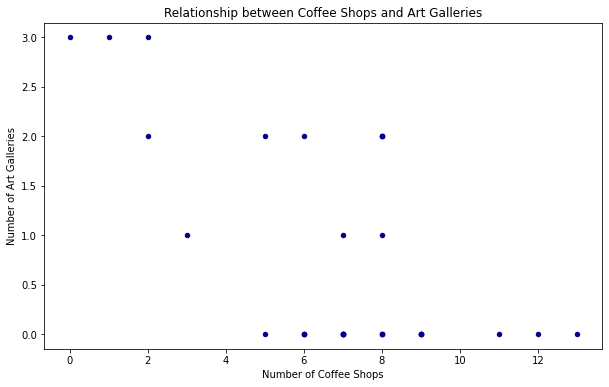

In [50]:
# Testing the correlation between parameters
london_grouped.plot(kind='scatter', y="Art Gallery", x="Coffee Shop", figsize=(10, 6), color='darkblue')

plt.title('Relationship between Coffee Shops and Art Galleries')
plt.xlabel('Number of Coffee Shops')
plt.ylabel('Number of Art Galleries')

In [51]:
import matplotlib.pyplot as plt

In [71]:
num_top_venues = 5

for hood in london_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
           venue  freq
0    Supermarket   8.0
1           Park   8.0
2    Coffee Shop   7.0
3  Grocery Store   7.0
4            Pub   4.0


----Barnet----
           venue  freq
0    Coffee Shop  13.0
1            Pub  13.0
2           Café   6.0
3           Park   5.0
4  Grocery Store   5.0


----Bexley----
           venue  freq
0            Pub  15.0
1  Grocery Store  12.0
2    Coffee Shop   7.0
3    Supermarket   7.0
4           Park   5.0


----Brent----
                       venue  freq
0          Indian Restaurant  12.0
1                       Park   7.0
2                Coffee Shop   5.0
3  Middle Eastern Restaurant   4.0
4                Pizza Place   4.0


----Bromley----
                  venue  freq
0                   Pub  12.0
1           Coffee Shop   8.0
2                  Park   7.0
3     Indian Restaurant   6.0
4  Gym / Fitness Center   5.0


----Camden----
               venue  freq
0             Garden   6.0
1               Park   6.0
2

In [72]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [73]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Supermarket,Park,Grocery Store,Coffee Shop,Clothing Store,Department Store,Turkish Restaurant,Pub,Café,Gym
1,Barnet,Coffee Shop,Pub,Café,Turkish Restaurant,Grocery Store,Park,Italian Restaurant,Bakery,Supermarket,Bookstore
2,Bexley,Pub,Grocery Store,Supermarket,Coffee Shop,Park,Gym / Fitness Center,Pharmacy,Clothing Store,Italian Restaurant,Hotel
3,Brent,Indian Restaurant,Park,Coffee Shop,Gym / Fitness Center,Pizza Place,Middle Eastern Restaurant,Clothing Store,Grocery Store,Supermarket,Café
4,Bromley,Pub,Coffee Shop,Park,Indian Restaurant,Gym / Fitness Center,Italian Restaurant,Pizza Place,Grocery Store,Café,Supermarket


### Data Analysis
#### Separating Boroughs into Clusters

In [74]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

london_grouped_clustering = london_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 4, 4, 0, 4, 1, 4, 4, 4, 1], dtype=int32)

In [75]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [76]:
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,Barking and Dagenham,Supermarket,Park,Grocery Store,Coffee Shop,Clothing Store,Department Store,Turkish Restaurant,Pub,Café,Gym
1,4,Barnet,Coffee Shop,Pub,Café,Turkish Restaurant,Grocery Store,Park,Italian Restaurant,Bakery,Supermarket,Bookstore
2,4,Bexley,Pub,Grocery Store,Supermarket,Coffee Shop,Park,Gym / Fitness Center,Pharmacy,Clothing Store,Italian Restaurant,Hotel
3,0,Brent,Indian Restaurant,Park,Coffee Shop,Gym / Fitness Center,Pizza Place,Middle Eastern Restaurant,Clothing Store,Grocery Store,Supermarket,Café
4,4,Bromley,Pub,Coffee Shop,Park,Indian Restaurant,Gym / Fitness Center,Italian Restaurant,Pizza Place,Grocery Store,Café,Supermarket


In [77]:
london_merged = Lon_Bor

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Borough')

london_merged.head() # check the last columns!

,Borough,Authority,Politics,HQ,Area,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,Town Hall,13.93,"194,352",51.5541,0.1340,4,Supermarket,Park,Grocery Store,Coffee Shop,Clothing Store,Department Store,Turkish Restaurant,Pub,Café,Gym
1,Barnet,Barnet London Borough Council,Conservative,Barnet House,33.49,"369,088",51.6569,-0.1949,4,Coffee Shop,Pub,Café,Turkish Restaurant,Grocery Store,Park,Italian Restaurant,Bakery,Supermarket,Bookstore
2,Bexley,Bexley London Borough Council,Conservative,Civic Offices,23.38,"236,687",51.4399,0.1543,4,Pub,Grocery Store,Supermarket,Coffee Shop,Park,Gym / Fitness Center,Pharmacy,Clothing Store,Italian Restaurant,Hotel
3,Brent,Brent London Borough Council,Labour,Brent Civic Centre,16.70,"317,264",51.5673,-0.2711,0,Indian Restaurant,Park,Coffee Shop,Gym / Fitness Center,Pizza Place,Middle Eastern Restaurant,Clothing Store,Grocery Store,Supermarket,Café
4,Bromley,Bromley London Borough Council,Conservative,Civic Centre,57.97,"317,899",51.4060,0.0132,4,Pub,Coffee Shop,Park,Indian Restaurant,Gym / Fitness Center,Italian Restaurant,Pizza Place,Grocery Store,Café,Supermarket


Display Clusters on map

In [573]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                                            failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.9|3.6.9|3.6.9|3.6.9|>=3.6,<3.7.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|>=3.7,<3.8.0a0|>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|3.4.*',build='3_73_pypy|2_73_pypy|1_73_pypy|0_73_pypy']
  - rsa -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.7

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the ri

ModuleNotFoundError: No module named 'folium'

In [454]:
latitude
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

NameError: name 'folium' is not defined

In [78]:
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Authority,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Brent London Borough Council,"317,264",51.5673,-0.2711,0,Indian Restaurant,Park,Coffee Shop,Gym / Fitness Center,Pizza Place,Middle Eastern Restaurant,Clothing Store,Grocery Store,Supermarket,Café
12,Harrow London Borough Council,"243,372",51.5806,-0.3420,0,Indian Restaurant,Coffee Shop,Pub,Park,Café,Gym / Fitness Center,Supermarket,Hotel,Portuguese Restaurant,Clothing Store


In [79]:
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Authority,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Camden London Borough Council,"229,719",51.5455,-0.1628,1,Park,Garden,Hotel,French Restaurant,Bookstore,Pub,Art Gallery,Cocktail Bar,Indian Restaurant,Zoo Exhibit
9,Greenwich London Borough Council,"264,008",51.4934,0.0098,1,Pub,Coffee Shop,Park,Garden,Gym / Fitness Center,Trail,Hotel,Supermarket,Café,Plaza
18,Kingston upon Thames London Borough Council,"166,793",51.4123,-0.3007,1,Pub,Coffee Shop,Café,Park,Supermarket,Burger Joint,Garden,Gastropub,Gym / Fitness Center,Hotel
19,Lambeth London Borough Council,"314,242",51.4571,-0.1231,1,Coffee Shop,Park,Café,Pub,Pizza Place,Italian Restaurant,Market,Beer Store,Ice Cream Shop,Garden
22,Newham London Borough Council,"318,227",51.5255,0.0352,1,Pub,Park,Bar,Hotel,Café,Gym / Fitness Center,Beer Bar,Restaurant,Burger Joint,Supermarket
24,Richmond upon Thames London Borough Council,"191,365",51.4613,-0.3037,1,Pub,Park,Garden,Coffee Shop,Café,Botanical Garden,Historic Site,Bakery,Italian Restaurant,Supermarket
27,Tower Hamlets London Borough Council,"272,890",51.5203,-0.0293,1,Coffee Shop,Pub,Bakery,Café,Pizza Place,Flea Market,Market,Park,Brewery,Beer Bar


In [80]:
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Authority,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Islington London Borough Council,"215,667",51.5465,-0.1058,2,Cocktail Bar,Pub,Hotel,Market,Pizza Place,Park,Coffee Shop,Bakery,Theater,Italian Restaurant
17,Kensington and Chelsea London Borough Council,"155,594",51.4991,-0.1938,2,Hotel,Park,Café,Department Store,Garden,Ice Cream Shop,Restaurant,Japanese Restaurant,Hotel Bar,Gym / Fitness Center
25,Southwark London Borough Council,"298,464",51.5028,-0.0877,2,Hotel,Coffee Shop,Cocktail Bar,Scenic Lookout,Art Museum,Garden,Street Food Gathering,Theater,Italian Restaurant,Grocery Store
30,Westminster City Council,"226,841",51.4975,-0.1357,2,Hotel,Plaza,Lounge,Cocktail Bar,Boutique,Department Store,Indian Restaurant,Art Gallery,Art Museum,Park


In [81]:
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Authority,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Hackney London Borough Council,"257,379",51.5734,-0.0724,3,Pub,Turkish Restaurant,Café,Coffee Shop,Park,Vegetarian / Vegan Restaurant,Bakery,Nature Preserve,Brewery,Japanese Restaurant
11,Haringey London Borough Council,"263,386",51.5906,-0.1110,3,Pub,Café,Coffee Shop,Turkish Restaurant,Park,Bakery,Trail,Pizza Place,Japanese Restaurant,Organic Grocery
20,Lewisham London Borough Council,"286,180",51.4415,-0.0117,3,Pub,Park,Coffee Shop,Café,Italian Restaurant,Historic Site,Turkish Restaurant,Beer Store,Theater,Bar
21,Merton London Borough Council,"203,223",51.4098,-0.2108,3,Pub,Park,Coffee Shop,Café,Supermarket,Sushi Restaurant,Korean Restaurant,Tennis Stadium,Burger Joint,Tennis Court
28,Waltham Forest London Borough Council,"265,797",51.5886,-0.0118,3,Pub,Park,Coffee Shop,Café,Restaurant,Fish & Chips Shop,Pizza Place,Mediterranean Restaurant,Nature Preserve,Brewery
29,Wandsworth London Borough Council,"310,516",51.4568,-0.1897,3,Coffee Shop,Park,Café,Pub,Pizza Place,Soccer Stadium,Italian Restaurant,French Restaurant,Tennis Court,Tennis Stadium


In [82]:
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Authority,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham London Borough Council,"194,352",51.5541,0.1340,4,Supermarket,Park,Grocery Store,Coffee Shop,Clothing Store,Department Store,Turkish Restaurant,Pub,Café,Gym
1,Barnet London Borough Council,"369,088",51.6569,-0.1949,4,Coffee Shop,Pub,Café,Turkish Restaurant,Grocery Store,Park,Italian Restaurant,Bakery,Supermarket,Bookstore
2,Bexley London Borough Council,"236,687",51.4399,0.1543,4,Pub,Grocery Store,Supermarket,Coffee Shop,Park,Gym / Fitness Center,Pharmacy,Clothing Store,Italian Restaurant,Hotel
4,Bromley London Borough Council,"317,899",51.4060,0.0132,4,Pub,Coffee Shop,Park,Indian Restaurant,Gym / Fitness Center,Italian Restaurant,Pizza Place,Grocery Store,Café,Supermarket
6,Croydon London Borough Council,"372,752",51.3762,-0.0982,4,Pub,Coffee Shop,Grocery Store,Park,Café,Pizza Place,Gym / Fitness Center,Bookstore,Golf Course,Italian Restaurant
7,Ealing London Borough Council,"342,494",51.5250,-0.3414,4,Park,Pub,Coffee Shop,Indian Restaurant,Café,Grocery Store,Pizza Place,Gym / Fitness Center,Hotel,Portuguese Restaurant
8,Enfield London Borough Council,"320,524",51.6623,-0.1181,4,Pub,Park,Supermarket,Café,Coffee Shop,Garden Center,Grocery Store,Turkish Restaurant,Fish & Chips Shop,Gym / Fitness Center
13,Havering London Borough Council,"242,080",51.5779,0.2121,4,Pub,Coffee Shop,Grocery Store,Park,Café,Supermarket,Italian Restaurant,Bakery,Fast Food Restaurant,Restaurant
14,Hillingdon London Borough Council,"286,806",51.5378,-0.4511,4,Coffee Shop,Pub,Indian Restaurant,Supermarket,Grocery Store,Hotel,Pizza Place,Fast Food Restaurant,Chinese Restaurant,Burger Joint
15,Hounslow London Borough Council,"262,407",51.4609,-0.3731,4,Pub,Park,Coffee Shop,Indian Restaurant,Italian Restaurant,Café,Hotel,Supermarket,Clothing Store,Portuguese Restaurant


#### Visualising Key Parameters for each Borough and Cluster

In [83]:
london_parks = london_grouped[['Neighborhood', 'Park']]

london_parks.set_index('Neighborhood', inplace=True)
london_parks.head()

,Park
Neighborhood,
Barking and Dagenham,8
Barnet,5
Bexley,5
Brent,7
Bromley,7


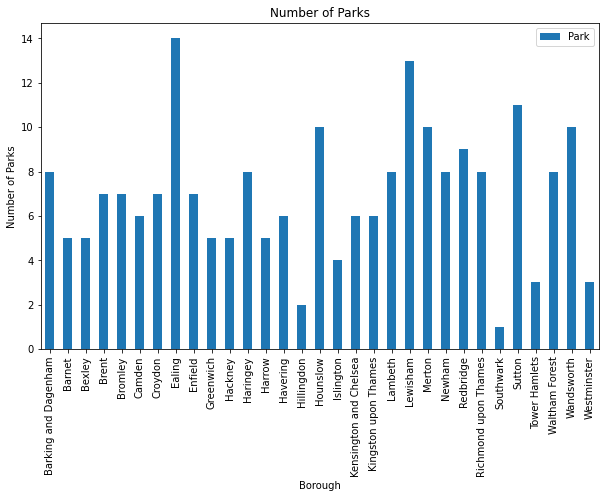

In [84]:
import matplotlib as mpl
import matplotlib.pyplot as plt

london_parks.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('Number of Parks') # add y-label to the plot
plt.title('Number of Parks') # add title to the plot

plt.show()

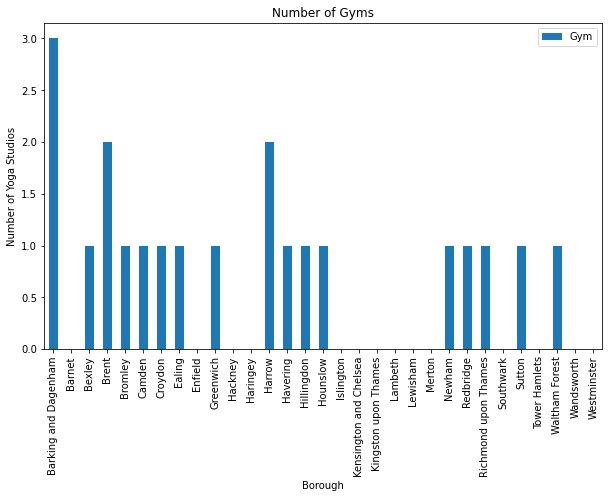

In [55]:
gym = london_grouped[['Neighborhood', 'Gym']]

gym.set_index('Neighborhood', inplace=True)
gym.head()

gym.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('Number of Yoga Studios') # add y-label to the plot
plt.title('Number of Gyms') # add title to the plot

plt.show()

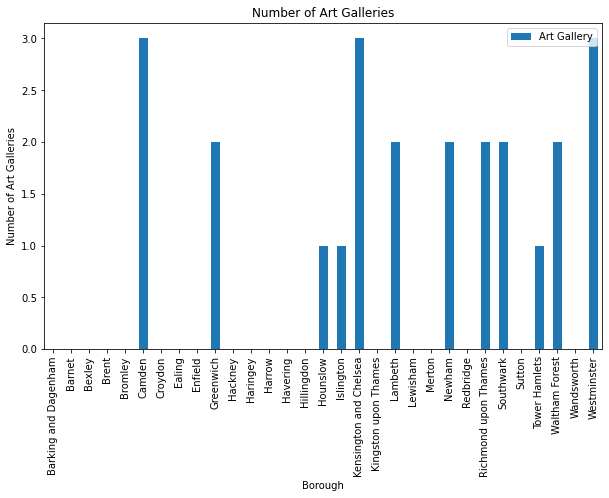

In [56]:
art = london_grouped[['Neighborhood', 'Art Gallery']]

art.set_index('Neighborhood', inplace=True)

art.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('Number of Art Galleries') # add y-label to the plot
plt.title('Number of Art Galleries') # add title to the plot

plt.show()

In [57]:
london_grouped.head()

,Neighborhood,Afghan Restaurant,African Restaurant,Airport Lounge,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Barking and Dagenham,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barnet,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bexley,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Brent,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Bromley,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [95]:
london_grouped.head()

,Cluster Labels,Neighborhood,Afghan Restaurant,African Restaurant,Airport Lounge,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,4,Barking and Dagenham,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,Barnet,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,Bexley,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,Brent,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Bromley,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [108]:
clustered = london_grouped.groupby('Cluster Labels').sum()
clustered.head()

,Afghan Restaurant,African Restaurant,Airport Lounge,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
Cluster Labels,,,,,,,,,,,,,,,,,,,,,
0,0,2,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,5,12,1,1,4,3,...,1,0,0,4,3,1,1,2,1,3
2,0,0,0,0,0,9,7,1,1,0,...,0,2,0,4,2,1,0,2,0,1
3,0,0,0,0,1,2,0,1,1,1,...,1,0,0,7,2,0,0,2,0,0
4,1,0,1,9,1,1,0,3,4,5,...,1,0,1,1,1,1,0,1,0,0


In [109]:
my_list = london_grouped.columns.values.tolist()
print(my_list)

['Cluster Labels', 'Neighborhood', 'Afghan Restaurant', 'African Restaurant', 'Airport Lounge', 'American Restaurant', 'Argentinian Restaurant', 'Art Gallery', 'Art Museum', 'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports', 'Australian Restaurant', 'Auto Garage', 'Auto Workshop', 'BBQ Joint', 'Bagel Shop', 'Bakery', 'Bar', 'Beer Bar', 'Beer Garden', 'Beer Store', 'Bike Shop', 'Bistro', 'Bookstore', 'Botanical Garden', 'Boutique', 'Brasserie', 'Brazilian Restaurant', 'Breakfast Spot', 'Brewery', 'Buffet', 'Burger Joint', 'Burrito Place', 'Bus Stop', 'Butcher', 'Café', 'Cajun / Creole Restaurant', 'Camera Store', 'Campground', 'Canal', 'Canal Lock', 'Candy Store', 'Caribbean Restaurant', 'Castle', 'Cave', 'Cheese Shop', 'Chinese Restaurant', 'Chocolate Shop', 'Circus School', 'Climbing Gym', 'Clothing Store', 'Cocktail Bar', 'Coffee Shop', 'Comic Shop', 'Community Center', 'Concert Hall', 'Convenience Store', 'Cosmetics Shop', 'Coworking Space', 'Creperie', 'Cricket Ground

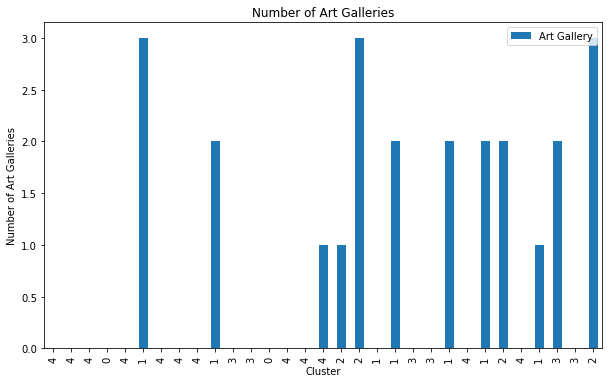

In [110]:
art_clust = london_grouped[['Cluster Labels', 'Art Gallery']]
art_clust.set_index('Cluster Labels', inplace=True)
art_clust.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Cluster') # add to x-label to the plot
plt.ylabel('Number of Art Galleries') # add y-label to the plot
plt.title('Number of Art Galleries') # add title to the plot

plt.show()

In [111]:
movie_clust = clustered[['Cluster Labels', 'Movie Theater']]

movie_clust.set_index('Cluster Labels', inplace=True)
movie_clust.head()

movie_clust.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Cluster') # add to x-label to the plot
plt.ylabel('Number of Cinemas') # add y-label to the plot
plt.title('Number of Cinemas') # add title to the plot

plt.show()


KeyError: "['Cluster Labels'] not in index"

In [62]:
music_clust = clustered[['Cluster Labels', 'Music Venue']]

music_clust.set_index('Cluster Labels', inplace=True)
music_clust.head()

music_clust.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Cluster') # add to x-label to the plot
plt.ylabel('Number of Music Venues') # add y-label to the plot
plt.title('Number of Music Venues') # add title to the plot

plt.show()

NameError: name 'clustered' is not defined

In [86]:
Filtered = london_grouped.filter(["Cluster Labels", "Neighborhood", "Art Gallery"]) 
Filtered.head(10)

clust1_art = Filtered.loc[Filtered['Cluster Labels'] == 1]
clust1_art.head()

clust1_art.set_index('Neighborhood', inplace=True)

KeyError: 'Cluster Labels'

In [116]:
clust1_art.head()

NameError: name 'clust1_art' is not defined

In [64]:
clust1_art2= clust1_art.drop('Cluster Labels', axis=1)

NameError: name 'clust1_art' is not defined

In [65]:
clust1_art2.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('Number of Art Galleries') # add y-label to the plot
plt.title('Number of Art Galleries in each Cluster 1 Borough') # add title to the plot

plt.show()

NameError: name 'clust1_art2' is not defined

In [66]:
art_gallery= clustered_neigh["Museum","Art Gallery"]

art_gallery.head()

NameError: name 'clustered_neigh' is not defined

In [87]:
clustered.head()

NameError: name 'clustered' is not defined

## Random Forest Algorithm

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [114]:
artistic_venues = clustered[['Art Gallery', 'Art Museum', 'Arts & Crafts Store', 'Bookstore','Concert Hall','Historic Site', 'History Museum', 'Indie Movie Theater', 'Indie Theater', 'Jazz Club', 'Monument / Landmark', 'Movie Theater', 'Multiplex', 'Museum', 'Music Store', 'Music Venue', 'Opera House', 'Outdoor Sculpture', 'Palace', 'Performing Arts Venue', 'Planetarium', 'Science Museum', 'Sculpture Garden','Theater', 'Wine Shop']]

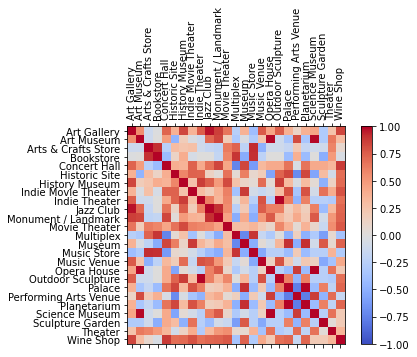

In [115]:
corr = artistic_venues.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(artistic_venues.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(artistic_venues.columns)
ax.set_yticklabels(artistic_venues.columns)
plt.show()